<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/TangSiChuon_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount My Google Drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [21]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

# Display dataset info
print("Initial dataset shape:", df.shape)
df.head();

Initial dataset shape: (11430, 89)


Data Cleaning

In [22]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

# Check if there are any categorical values that need encoding
print("Data types:\n", df.dtypes)

# Identify the label column (based on your output, it's likely 'status')
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)
elif 'status' in df.columns:
    df.rename(columns={'status': 'label'}, inplace=True)
else:
    raise KeyError("No target label column found. Please ensure the dataset has a 'class' or 'status' column.")

# Drop non-numeric and non-informative columns like 'url'
df.drop(columns=['url'], inplace=True, errors='ignore')

# Convert label column to binary (e.g., 'phishing' = 1, 'legitimate' = 0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

After dropping NA: (11430, 89)
Data types:
 url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


Result After Clean

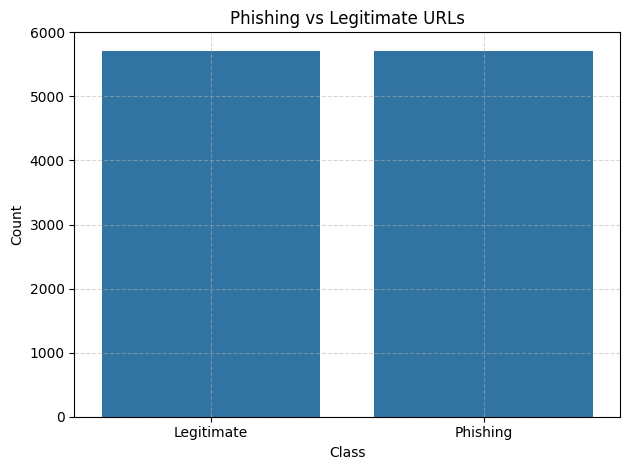

In [30]:
sns.countplot(data=df, x='label')
plt.title('Phishing vs Legitimate URLs')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN Model

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9448818897637795
Confusion Matrix:
 [[1115   42]
 [  84 1045]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1157
           1       0.96      0.93      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.95      0.94      0.94      2286
weighted avg       0.95      0.94      0.94      2286



Visual after KNN

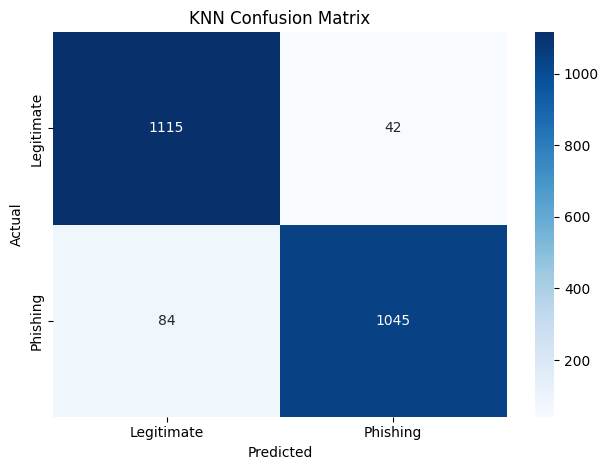

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.tight_layout()
plt.show()
